Goal of this Notebook: 
1. Generate signal TSD 
2. 

In [1]:
%load_ext autoreload
# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2
import sys
import pandas as pd
# sys.path.append("..\\")
# sys.path
import FLUCCOplus.transform as traffo
import FLUCCOplus.signals as fps
import FLUCCOplus.plots as fpp


col_selection = ["Hochrechnung Ueberschuss 2050", "Neuhof III", "Wind AT 2020"]

ModuleNotFoundError: No module named 'FLUCCOplus'

In [ ]:
signals = fps.load_all()
selection = signals

all_points = []
for ratio in [0.2,0.3,0.4,0.5, 0.6]:
    discrete_signal_tsd = fps.discretize_dynamic(selection, ratio)
    points = fps.get_signal_points_as_df(discrete_signal_tsd)
    points["ratio"] = ratio
    all_points.append(points)
    
all_points_df = pd.concat(all_points, ignore_index=True)
all_points_df.name.unique()


array(['Wind 2013', 'Wind 2015', 'Wind 2016',
       'Wind 2030, TU EEG, "Stromzukunft"', 'WEB 2015 Umgebung Wien',
       'Hochrechnung Ueberschuss 2050', 'Wind AT 2017', 'Wind AT 2018',
       'Wind AT 2019', 'Wind AT 2020', 'REF', 'REG', 'uba30', 'uba50',
       'veigl30', 'veigl50', '1.5WP-3K-PV/Battery-CO2',
       '1.3WP-3K-PV/Battery-CO2', '1.3WP-3K-keine PV/Battery-CO2/Preis',
       '1.3WP-3K-PV/Battery-CO2/Preis', '1.3WP-3K-PV/Battery-Preis',
       'Neuhof I', 'Neuhof III', 'Maustrenk', 'STERN I', 'STERN II',
       'STERN III', 'Schaltsignal_REF', 'Schaltsignal_REG',
       'Schaltsignal_UBA30', 'Schaltsignal_UBA50', 'Schaltsignal_VEIGL30',
       'Schaltsignal_VEIGL50'], dtype=object)

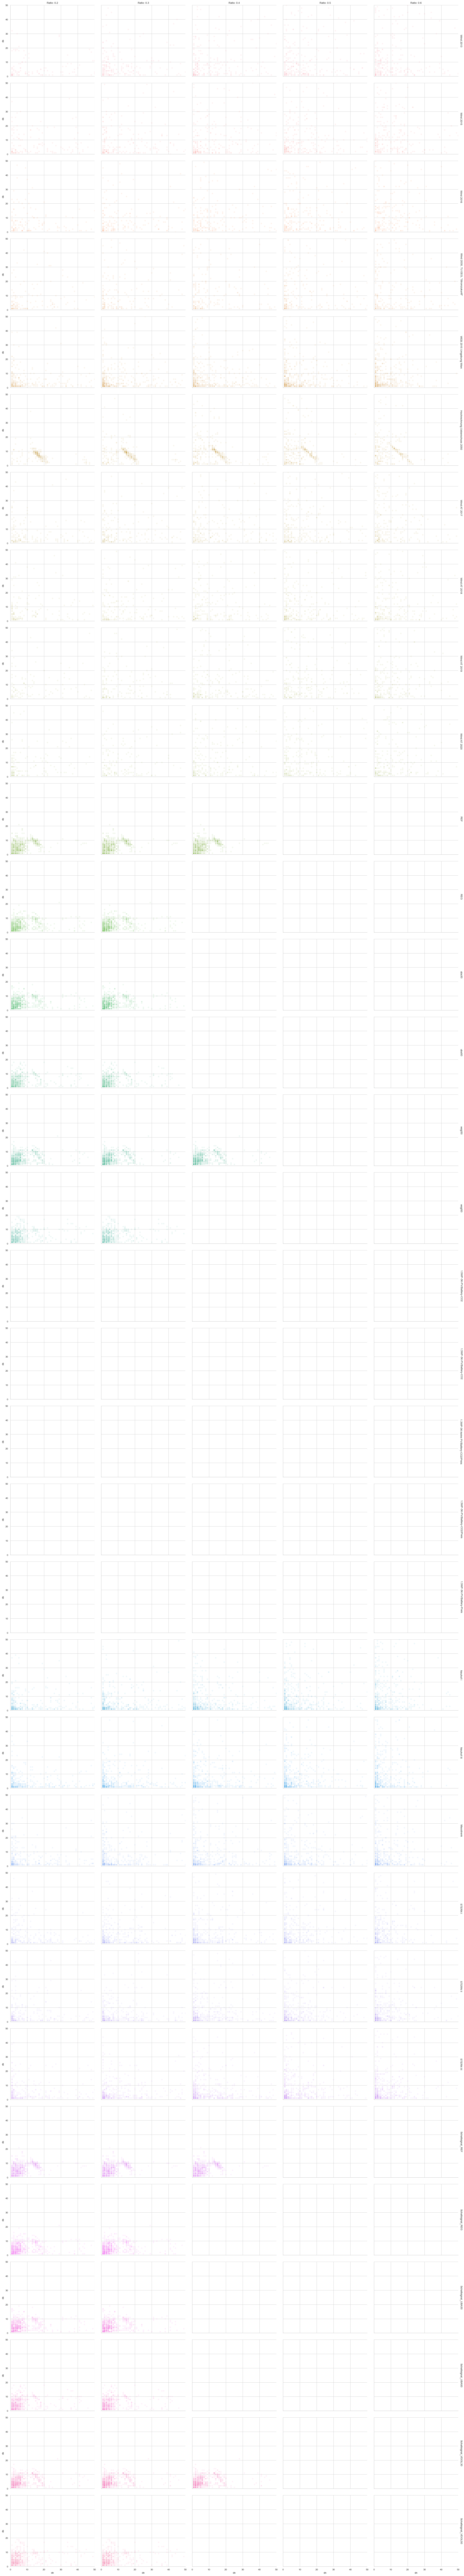

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

# Example data structure:
# all_points_df has columns: 'dn', 'ds', 'name', 'ratio'

# Create a FacetGrid with rows = 'name' and cols = 'ratio'
g = sns.FacetGrid(all_points_df, row="name", col="ratio", hue="name", margin_titles=True, height=4, aspect=1.2)

# Map a scatterplot onto the grid
g.map(sns.scatterplot, "dn", "ds", alpha=0.1, marker="s")

# Adjust axis limits (optional)
g.set(ylim=(0, 50), xlim=(0, 50))

# Add titles and labels
g.set_axis_labels("dn", "ds")
g.set_titles(row_template="{row_name}", col_template="Ratio: {col_name}")
g.tight_layout()

# Show the plot
plt.show()

# CAREFUL: this takes 5 minutes!

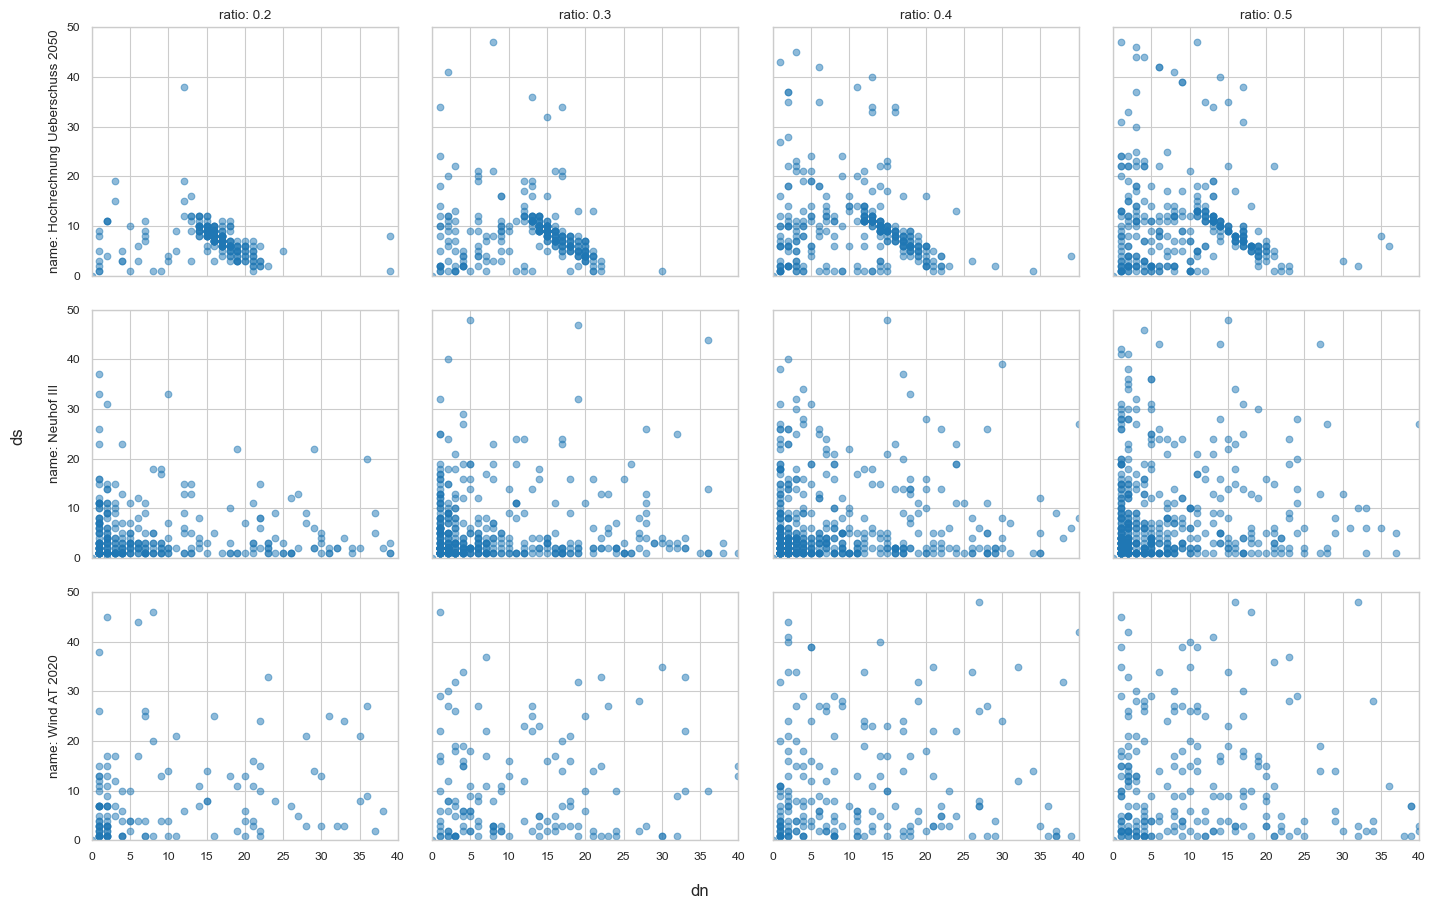

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def scatterplot_grid(df, x_col, y_col, row_col, col_col, figsize=(15, 10)):
    """
    Creates a grid of scatter plots using Matplotlib, with rows based on a column 
    and columns based on another column.

    Parameters:
    df (pd.DataFrame): Dataframe containing the data.
    x_col (str): Column name for x-axis values.
    y_col (str): Column name for y-axis values.
    row_col (str): Column name to determine rows.
    col_col (str): Column name to determine columns.
    figsize (tuple): Figure size for the entire grid.
    """
    # Get unique values for rows and columns
    row_values = df[row_col].unique()
    col_values = df[col_col].unique()
    
    # Create a grid of subplots
    fig, axes = plt.subplots(len(row_values), len(col_values), figsize=figsize, sharex=True, sharey=True)
    axes = np.atleast_2d(axes)  # Ensure axes is always a 2D array

    # Iterate over rows and columns
    for i, row_val in enumerate(row_values):
        for j, col_val in enumerate(col_values):
            ax = axes[i, j]
            
            # Filter data for the current combination of row and column
            subset = df[(df[row_col] == row_val) & (df[col_col] == col_val)]
            
            # Plot scatter if subset is not empty
            if not subset.empty:
                ax.scatter(subset[x_col], subset[y_col], alpha=0.2, marker="s", )
            
            # Set subplot title and labels
            if i == 0:  # Top row: column titles
                ax.set_title(f"{col_col}: {col_val}")
            if j == 0:  # Leftmost column: row labels
                ax.set_ylabel(f"{row_col}: {row_val}")
            
            # Set axis limits (optional, adjust based on your data)
            ax.set_xlim(0, 40)
            ax.set_ylim(0, 50)
            ax.set_aspect("equal")

    # Adjust layout and add shared axis labels
    fig.text(0.5, 0.04, x_col, ha='center', fontsize=12)
    fig.text(0.04, 0.5, y_col, va='center', rotation='vertical', fontsize=12)
    fig.tight_layout(rect=[0.05, 0.05, 1, 0.95])
    plt.show()

# Example usage
# Assuming `all_points_df` has columns 'dn', 'ds', 'name', 'ratio'
scatterplot_grid(all_points_df, x_col='dn', y_col='ds', row_col='name', col_col='ratio')
